In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
df1 = pd.read_excel("IA_Project_Data.xlsx", sheet_name = 0)
df2 = pd.read_excel("IA_Project_Data.xlsx", sheet_name = 1)
df3 = pd.read_excel("IA_Project_Data.xlsx", sheet_name = 2)

# Question 1

Annualized Return Rates (12 / num_months):
S&P 500      0.10488265713470679
MSCI EAFE      0.08666648523298037
US AGGREGATE BOND      0.06612973651574916
CITI NON US GOVT BOND      0.05888440419013419
US 30 Day T-Bill      0.04442615818650797
S&P 500                  0.104883
MSCI EAFE                0.086666
US AGGREGATE BOND        0.066130
CITI NON US GOVT BOND    0.058884
US 30 Day T-Bill         0.044426
dtype: float64
Annualized Standard Deviation:
S&P 500                  0.154196
MSCI EAFE                0.168262
US AGGREGATE BOND        0.053338
CITI NON US GOVT BOND    0.094254
US 30 Day T-Bill         0.009676
dtype: float64

Betas: 
S&P 500                  1.000000
MSCI EAFE                0.722178
US AGGREGATE BOND        0.075920
CITI NON US GOVT BOND    0.063375
US 30 Day T-Bill        -0.000806
Name: S&P 500, dtype: float64
alphas:
S&P 500                  7.632783e-17
MSCI EAFE               -1.420028e-03
US AGGREGATE BOND        1.711370e-02
CITI NON US GOVT BOND    

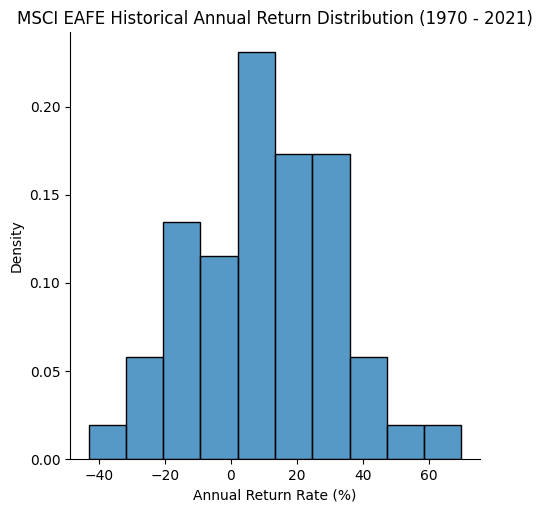

In [8]:
from numpy.core.multiarray import min_scalar_type
"""
df1_clone = df1.drop(columns = ["Unnamed: 0"])
df1_clone = df1_clone.divide(100)
df1_clone = df1_clone.add(1)
total_ret_rate = df1_clone.product(axis = "index", skipna = True)
ann_rate = total_ret_rate.pow(1/12) - 1
print("Annualized Return Rates:")
print(ann_rate)
print("")
"""
####
## OR
###

df1_clone = df1.drop(columns = ["Unnamed: 0"])
df1_clone = df1_clone.divide(100)
df1_clone = df1_clone.add(1)
total_ret_rate = df1_clone.product(axis = "index", skipna = True)
ann_rate= np.zeros(len(total_ret_rate))
print("Annualized Return Rates (12 / num_months):")
for i in range(len(df1_clone.columns)):
  month_count = df1_clone[df1_clone.columns[i]].count()
  ann_rate[i] = total_ret_rate[i] ** (12/ month_count) - 1
  print(df1_clone.columns[i] + "      " + str(ann_rate[i]))
###
df1_clone = df1.drop(columns = ["Unnamed: 0"])
df1_clone = df1_clone.divide(100)
df1_clone = df1_clone.add(1)
ann_rate = df1_clone.prod().pow(12/df1_clone.count()) - 1
print(ann_rate)
####
df1_clone = df1.drop(columns = ["Unnamed: 0"])
df1_clone = df1_clone.divide(100).add(1)
std_monthly = df1_clone.std(axis = "index", skipna = True)
ann_std = std_monthly.mul(math.sqrt(12))
print("Annualized Standard Deviation:")
print(ann_std)
print("")

###
df1_clone = df1.drop(columns = ["Unnamed: 0"])
covs = df1_clone.cov()
vars = df1_clone.var()
print("Betas: ")
betas = covs['S&P 500'] / vars['S&P 500']
print(betas)

###
alphas = ann_rate - ann_rate[-1] - (betas * (ann_rate[0] - ann_rate[-1]))
print("alphas:")
print(alphas)

###
"""
sharpes = (ann_rate - ann_rate[-1]) / ann_std
print("sharpes:")
print(sharpes)
"""
sharpes = (df1_clone.mean() - df1_clone.mean()['US 30 Day T-Bill'])/ df1_clone.std()
print("mean of t-bill" + str(df1_clone.mean()['US 30 Day T-Bill']))
print("sharpes try 2")
print(sharpes * math.sqrt(12))

"""
print("sharpes try 3")
print(((df1_clone.sub(df1_clone['US 30 Day T-Bill'])).mean() / (df1_clone.sub(df1_clone['US 30 Day T-Bill'])).std()) * math.sqrt(12))

for column in df1_clone.columns:
  print(column + str(((df1_clone[column] - df1_clone['US 30 Day T-Bill']).mean() / (df1_clone[column] - df1_clone['US 30 Day T-Bill']).std()) * math.sqrt(12)))
"""
####
df1_clone = df1.drop(columns = ["Unnamed: 0"])
df1_clone = df1_clone.divide(100).add(1)
corrs = df1_clone.corr()
print("Pairwise (Pearson/Simple) Correlation Coefficients:")
print(corrs)
print("")
#corrs.to_csv('simple_ret_corrs.csv', encoding = 'utf-8-sig')
###
"""
df1_clone = df1.drop(columns = ["Unnamed: 0"])
df1_clone = df1_clone.divide(100).add(1)
corrs = df1_clone.corr(method = 'spearman')
print("Pairwise (Spearman) Correlation Coefficients:")
print(corrs)
print("")
"""
####
df1_clone = df1.drop(columns = ["Unnamed: 0"])
df1_clone = 100*df1_clone.divide(100).add(1).apply(np.log)
corrs = df1_clone.corr()
print("Pairwise (Pearson/Simple) Correlation Coefficients on Log Returns:")
print(corrs)
print("")
#corrs.to_csv('log_ret_corrs.csv', encoding = 'utf-8-sig')

###
df1_clone = df1.drop(columns = ["Unnamed: 0"])
df1_clone = df1_clone.divide(100)
df1_clone = df1_clone.add(1)
MSCI_annual_rets = df1_clone['MSCI EAFE'].groupby(df1_clone.index // 12).prod()
#print(MSCI_annual_rets)
print("number of annual returns = " + str(len(MSCI_annual_rets) * 12))
print("actual number of months = " + str(df1_clone['MSCI EAFE'].count()))
print("--> Need to discard last annual return")
MSCI_annual_rets = MSCI_annual_rets[:-1] - 1
sns.displot(data = MSCI_annual_rets*100, kind='hist', stat='probability', bins = 10).set(title="MSCI EAFE Historical Annual Return Distribution (1970 - 2021)",
                                                                      xlabel="Annual Return Rate (%)", ylabel="Density")

# Question 2

In [98]:
# start with $1.000 in account
# (.400 in SP, .200 in MSCI EAFE, .200 in US Agg Bond, .150 in Citi Non-US Bond, and .050 in 30-Day US T bill)
# each month, rebalance
asset_array = (df1.drop(columns = ["Unnamed: 0"]).dropna().to_numpy() / 100) + 1
percent_alloc = np.array([0.4, 0.2, 0.2, 0.15, 0.05])
value_alloc = np.array([0.4, 0.2, 0.2, 0.15, 0.05])
monthly_rets = []
total_ret_rate = 1
# CURRENTLY: ENTIRELY DISCARDS ANY ROW/MONTH WITH NaN
for i in range(asset_array.shape[0]):
  if np.invert(np.isnan(asset_array[i][:])).all(): #DONT NEED THIS LINE WITH DROP NA
    prev_total_value = value_alloc.sum()
    new_total_value = value_alloc @ asset_array[i][:]
    value_alloc = new_total_value * percent_alloc
    monthly_rets.append((new_total_value - prev_total_value) / prev_total_value)
    total_ret_rate = total_ret_rate * (((new_total_value - prev_total_value) / prev_total_value) + 1)
num_months = len(monthly_rets)
ann_rate= total_ret_rate ** (12/ num_months) - 1
ann_std = np.std(monthly_rets) * math.sqrt(12)
print("Annualized Return Rate = " + str(ann_rate))
print("Annualized Std. Deviation of Returns = " + str(ann_std))


Annualized Return Rate = 0.08601190231068179
Annualized Std. Deviation of Returns = 0.09598854858121975


# Question 3

In [96]:
# start at oct-2012
## Is it annual or annualized std?
## Is is max(all annual returns) or highest annualized return?
## Is the portfolio rebalanced as in Q2, or is it a static allocation?

asset_array = (df1.drop(columns = ["Unnamed: 0"]).dropna().to_numpy() / 100) + 1
asset_array_10_yr = asset_array[-120:, :]
num_trials = 1000
stds = []
rets = []
weight_allocs = []
for j in range(num_trials):
  rand_weights_vec = np.random.uniform(low = 0.0, high = 1.0, size = 5)
  rand_weights_vec = rand_weights_vec / sum(rand_weights_vec)
  percent_alloc = rand_weights_vec
  value_alloc = rand_weights_vec
  monthly_rets = []
  total_ret_rate = 1
  # CURRENTLY: ENTIRELY DISCARDS ANY ROW/MONTH WITH NaN
  for i in range(asset_array_10_yr.shape[0]):
    prev_total_value = value_alloc.sum()
    new_total_value = value_alloc @ asset_array_10_yr[i][:]
    value_alloc = new_total_value * percent_alloc
    monthly_rets.append((new_total_value - prev_total_value) / prev_total_value)
    total_ret_rate = total_ret_rate * (((new_total_value - prev_total_value) / prev_total_value) + 1)
  num_months = len(monthly_rets)
  ann_rate= total_ret_rate ** (12/ num_months) - 1
  ann_std = np.std(monthly_rets) * math.sqrt(12)
  if(ann_std < 0.10):
    stds.append(ann_std)
    rets.append(ann_rate)
    weight_allocs.append(list(percent_alloc))

print(max(rets))
print(stds[rets.index(max(rets))])
print(weight_allocs[rets.index(max(rets))])
print(asset_array_10_yr.shape)


# 1 mil:
0.08874790177092029
0.09886353900112975
[0.6625770077069745, 0.011597473842906722, 0.13839692282702443, 0.00015073106258318923, 0.1872778645605113]
"""

0.077676514442657
0.0981690250856494
[0.5198912611108034, 0.1736996322512166, 0.007434597463896061, 0.0103319069802127, 0.2886426021938713]
(120, 5)


'\nAfter fix:\n# 100k\n0.0852427727852727\n0.09892008574734844\n[0.622357427952963, 0.055413179033086055, 0.1371143426588766, 0.010502977947134373, 0.17461207240794002]\n\n# 1 mil:\n0.08874790177092029\n0.09886353900112975\n[0.6625770077069745, 0.011597473842906722, 0.13839692282702443, 0.00015073106258318923, 0.1872778645605113]\n'

In [93]:
asset_array = (df1.drop(columns = ["Unnamed: 0"]).dropna().to_numpy() / 100) + 1
asset_array_10_yr = asset_array[-120:, :]
num_trials = 1000000
stds = []
rets = []
weight_allocs = []
for j in range(num_trials):
  #rand_weights_vec = np.random.uniform(low = 0.0, high = 1.0, size = 5)
  #rand_weights_vec = np.random.normal(loc = [0.2999395865248569, 0.1644681826294988, 0.00675025248462577, 0.5286917237599683, 0.00015025460105041474], scale = 0.1, size = 5)

  #rand_weights_vec = np.random.normal(loc = [0.622357427952963, 0.055413179033086055, 0.1371143426588766, 0.010502977947134373, 0.17461207240794002], scale = 0.1, size = 5)
  #while((rand_weights_vec < 0).any()):
    #rand_weights_vec = np.random.normal(loc = [0.622357427952963, 0.055413179033086055, 0.1371143426588766, 0.010502977947134373, 0.17461207240794002], scale = 0.1, size = 5)
  # bbest weights = [0.2753025482367888, 0.16051001291915312, 8.536203906914599e-05, 0.5595034555122583, 0.0045986212927305046]
  #low_bound = [0.25, 0.13, 0, 0.52, 0]
  #high_bound = [0.32, 0.2, 0.05, 0.59, 0.05]
  # best = [0.6625770077069745, 0.011597473842906722, 0.13839692282702443, 0.00015073106258318923, 0.1872778645605113]
  low_bound = [0.6, 0.0, 0.08, 0.0, 0.12]
  high_bound = [0.8, 0.06, 0.3, 0.05, 0.3]
  rand_weights_vec = np.random.uniform(low = low_bound, high = high_bound, size = 5)
  rand_weights_vec = rand_weights_vec / sum(rand_weights_vec)
  percent_alloc = rand_weights_vec
  value_alloc = rand_weights_vec
  monthly_rets = []
  total_ret_rate = 1
  # CURRENTLY: ENTIRELY DISCARDS ANY ROW/MONTH WITH NaN
  for i in range(asset_array_10_yr.shape[0]):
    if np.invert(np.isnan(asset_array_10_yr[i][:])).all(): #DONT NEED THIS LINE WITH DROP NA
      prev_total_value = value_alloc.sum()
      new_total_value = value_alloc @ asset_array_10_yr[i][:]
      value_alloc = new_total_value * percent_alloc
      monthly_rets.append((new_total_value - prev_total_value) / prev_total_value)
      total_ret_rate = total_ret_rate * (((new_total_value - prev_total_value) / prev_total_value) + 1)
  num_months = len(monthly_rets)
  ann_rate= total_ret_rate ** (12/ num_months) - 1
  ann_std = np.std(monthly_rets) * math.sqrt(12)
  if(ann_std < 0.10):
    stds.append(ann_std)
    rets.append(ann_rate)
    weight_allocs.append(list(percent_alloc))
"""
print(stds)
print(rets)
print(weight_allocs)
"""
print(max(rets))
print(stds[rets.index(max(rets))])
print(weight_allocs[rets.index(max(rets))])
"""
# 10k
0.15763030649887155
0.09955205705409126
[0.29283874500024004, 0.15915170058850225, 0.0026690844884379914, 0.5431552756701331, 0.0021851942526867137]

# 100k
0.1576655981606414
0.09983081534238253
[0.2999395865248569, 0.1644681826294988, 0.00675025248462577, 0.5286917237599683, 0.00015025460105041474]
"""

"""
shifted means to 100k best with previous: [0.2999395865248569, 0.1644681826294988, 0.00675025248462577, 0.5286917237599683, 0.00015025460105041474]
# 100k:
0.15771427466354604
0.09979183373118163
[0.2753025482367888, 0.16051001291915312, 8.536203906914599e-05, 0.5595034555122583, 0.0045986212927305046]
"""

"""
uniform with bounds:
# bbest weights = [0.2753025482367888, 0.16051001291915312, 8.536203906914599e-05, 0.5595034555122583, 0.0045986212927305046]
low_bound = [0.25, 0.13, 0, 0.52, 0]
high_bound = [0.32, 0.2, 0.05, 0.59, 0.05]

# 100k
BEST SO FAR:
0.15801899524746665
0.09999678683975781
[0.2764984301892742, 0.1598772532700396, 0.0021927374910408275, 0.5613625013248283, 6.907772481704642e-05]
^^ WRONG
"""

"""
RIGHT:

0.09019994412337651
0.09927914603851742
[0.6766991247236513, 0.005982052587971772, 0.05420346266945326, 0.0008790067134165961, 0.26223635330550715]

100000k with unif:
0.09062717198512527
0.0999839672048703
[0.6814975938440481, 0.003098739867135369, 0.08696579659672739, 0.0008794193232627377, 0.22698367645946174]

1 mil with bounded unif
USE THIS ONE:
0.09073768435972496
0.09982486931254639
[0.6828655618243273, 0.0011160217545381592, 0.0785867418588133, 0.0009024618591676413, 0.23652921270315347]
"""






0.09073768435972496
0.09982486931254639
[0.6828655618243273, 0.0011160217545381592, 0.0785867418588133, 0.0009024618591676413, 0.23652921270315347]


'\nRIGHT:\n\n0.09019994412337651\n0.09927914603851742\n[0.6766991247236513, 0.005982052587971772, 0.05420346266945326, 0.0008790067134165961, 0.26223635330550715]\n\n100000k with unif:\n0.09062717198512527\n0.0999839672048703\n[0.6814975938440481, 0.003098739867135369, 0.08696579659672739, 0.001454193232627377, 0.22698367645946174]\n'

# Question 4

In [34]:
"""
asset_array = (df1.drop(columns = ["Unnamed: 0"]).to_numpy() / 100) + 1
def prob_SP_greater_Tbill(num_years):
  SP_total_rets = []
  TBill_total_rets = []
  num_periods = 0
  num_periods_SP_greater = 0
  for i in range(asset_array.shape[0]):
    if not np.isnan(asset_array[i][0]) and not np.isnan(asset_array[i][4]):
"""
df1_clone = df1.drop(columns = ["Unnamed: 0"])
df1_clone = df1_clone.divide(100)
df1_clone = df1_clone.add(1)
def prob_SP_less_Tbill(num_years):
  total_rets = df1_clone.rolling(axis = 'index', window = int(12 * num_years), min_periods = int(12 * num_years)).apply(np.prod, raw = True) - 1
  total_rets = total_rets.dropna()
  #print(total_rets)
  #print(total_rets['S&P 500'][-11:])
  #print(total_rets['US 30 Day T-Bill'][100:105])
  return total_rets['S&P 500'].le(total_rets['US 30 Day T-Bill'], axis = 0).sum() / total_rets['S&P 500'].count()

print("Historical Probability that 1 yr. total return of SP500 < total T-Bill 1 yr. return = " + str(prob_SP_less_Tbill(1)))
print("Historical Probability that 5 yr. total return of SP500 < total T-Bill 5 yr. return = " + str(prob_SP_less_Tbill(5)))

Historical Probability that 1 yr. total return of SP500 < total T-Bill 1 yr. return = 0.20232558139534884
Historical Probability that 5 yr. total return of SP500 < total T-Bill 5 yr. return = 0.1467065868263473


# Question 5 HAVE TO EXCLUDE T BILL

In [19]:

!pip install gurobipy
import sys
import json
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import random
import matplotlib.pyplot as plt
import math

from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import inv,pinv
from scipy.optimize import minimize

 # risk budgeting optimization
def calculate_portfolio_var(w,V):
    # function that calculates portfolio risk
    w = np.matrix(w)
    return (w*V*w.T)[0,0]

def calculate_risk_contribution(w,V):
    # function that calculates asset contribution to total risk
    w = np.matrix(w)
    sigma = np.sqrt(calculate_portfolio_var(w,V))
    # Marginal Risk Contribution
    MRC = V*w.T
    # Risk Contribution
    RC = np.multiply(MRC,w.T)/sigma
    return RC

def risk_budget_objective(x,pars):
    # calculate portfolio risk
    V = pars[0]# covariance table
    x_t = pars[1] # risk target in percent of portfolio risk
    sig_p =  np.sqrt(calculate_portfolio_var(x,V)) # portfolio sigma
    risk_target = np.asmatrix(np.multiply(sig_p,x_t))
    asset_RC = calculate_risk_contribution(x,V)
    J = sum(np.square(asset_RC-risk_target.T))[0,0] # sum of squared error
    return J

def total_weight_constraint(x):
    return np.sum(x)-1.0

def long_only_constraint(x):
    return x

#!pip install Riskfolio-Lib

# create rolling 10-year trailing estimate
df1_clone = df1.drop(columns = ["Unnamed: 0"])
df1_clone = df1_clone.divide(100)
num_years = 10
#covs = df1_clone.rolling(num_years * 12).cov().dropna()
#### NOTE: THIS CURRENTLY INCLUDES T-BILLS IN WEIGHTING
covs = df1_clone.rolling(num_years * 12).cov()
#print(covs.count())
weights = np.array([0.4, 0.2, 0.2, 0.15, 0.05])
"""
def calc_MCTR(cov, weights):
  sum = 0
  for i in range(covs.shape[1]):
    for j in range(covs.shape[1]):
      sum += weights[i] * weights[j] * cov[i][j]
  sigma = math.sqrt(sum)
  MCTR = np.zeros(cov.shape[1])
  for i in range(covs.shape[1]):
    sum = 0
    for j in range(covs.shape[1]):
      sum += weights[j] * cov[i][j]
    MCTR[i] = sum / sigma
  return MCTR
"""
def calc_MCTR(cov, weights):
  sum = 0
  for i in range(cov.shape[1]):
    for j in range(cov.shape[1]):
      sum += weights[i] * weights[j] * cov[i][j]
  sigma = math.sqrt(sum)
  MCTR = np.zeros(cov.shape[1])
  for i in range(covs.shape[1]):
    sum = 0
    for j in range(cov.shape[1]):
      sum += weights[j] * cov[i][j]
    MCTR[i] = sum / sigma
  return MCTR

count = 0
total = 0
MCTRs = []
CTRs = []
PCTRs = []
for window in df1_clone.rolling(num_years * 12):
  cov = window.cov().to_numpy()
  total += 1
  if(not np.isnan(cov).any()): #SHOULD MAKE THIS START AT AROUND THE 300 MARK (180 + 120 WINDOW) right now it starts with only a single value in the series
    MCTR = calc_MCTR(cov, weights)
    MCTRs.append(MCTR.tolist())
    CTR = np.multiply(MCTR, weights)
    total_weight = CTR.sum()
    CTRs.append(np.multiply(MCTR, weights).tolist())
    PCTRs.append((CTR / total_weight).tolist())
print(np.array(MCTRs)) # units: contribution to return risk (in PERCENT BECAUSE RETURN)
print(np.array(CTRs)) # units: contribution to return risk (in PERCENT BECAUSE RETURN)
print(np.array(PCTRs)) # units: PERCENT of risk contribution (not in percent because of return, but percent of contribution)
# maybe make this last one in a plot where lines all add up to 1 and areas in between lines are shaded
### DISCARD FIRST 120 ROWS??


# for example, if at oct-22, then use covs[-1] for trailing? OR
# SINCE AT TIME T, HAVE ALL INFO, SO USE COVs[i] ?
weights = np.zeros((len(covs), 5))
#df1_clone = df1_clone.divide(100)
df1_clone = df1.copy().drop(columns = ['Unnamed: 0', 'US 30 Day T-Bill'])
num_years = 10
for window in df1_clone.rolling(num_years * 12):
  cov = window.cov().to_numpy()
  if(not np.isnan(cov).any()):
    m = gp.Model("new")
    m.Params.LogToConsole = 0
    m.params.NonConvex = 2
    w = m.addMVar(shape = 4, lb = 0.0, vtype = GRB.CONTINUOUS, name = "w")
    y = m.addMVar(shape = 4, lb=-gp.GRB.INFINITY, vtype = GRB.CONTINUOUS, name = "y")
    m.addConstr(w @ np.ones(4) == 1)
    # y = ln(w[i])
    for i in range(4):
      m.addGenConstrLog(w[i], y[i])
    obj_fn = 0
    """
    for i in range(5):
      for j in range(5):
        obj_fn += (w[i]*(cov @ w)[i] - w[j]*(cov @ w)[j])**2
    """
    obj_fn += 0.5 * w.T @ cov @ w
    for i in range(4):
      obj_fn -= (1/4)* y[i] # here "risk" weight "b" = 1/n because want equal risk weight
      # https://cran.r-project.org/web/packages/riskParityPortfolio/vignettes/RiskParityPortfolio.html#what-is-a-risk-parity-portfolio
      # https://bookdown.org/shenjian0824/portr/risk-parity-portfolio.html
    m.setObjective(obj_fn, GRB.MINIMIZE)
    m.optimize()
    #weights[i, :] = w.X
    print("Weight = " + str(w.X))
    print(calculate_risk_contribution(w.X,cov))
    """
    # test
    MCTR = calc_MCTR(cov, w.X)
    print("MCTR:")
    print(MCTR)
    CTR = np.multiply(MCTR, w.X)
    print("CTR:")
    print(CTR)
    total_weight = CTR.sum()
    print("PCTR")
    PCTR = (CTR / total_weight).tolist()
    print(PCTR)
    """
print(weights)

"""

import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=df1_clone)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
b = None # Risk contribution constraints vector
w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)
"""


# Risk Parity Solution:
## check using this package or calculator??
#import riskparityportfolio as rp
#optimum_weights = rp.vanilla.design(cov, b)
# or copy the code from this link to check:
#https://stackoverflow.com/questions/38218975/how-to-solve-risk-parity-allocation-using-python

[[ 2.40929113e-02  4.49416921e-02  2.12856914e-02  7.28826140e-02
  -4.60845988e-05]
 [ 2.95222788e-02  3.86765232e-02  1.73426295e-02  4.30394448e-02
  -1.22783495e-04]
 [ 3.23998675e-02  3.57150560e-02  1.69526454e-02  3.41869254e-02
  -1.33954915e-04]
 ...
 [ 3.90193892e-02  3.77523852e-02  3.82937738e-03  1.10720496e-02
  -3.82738526e-05]
 [ 4.00902072e-02  3.87030088e-02  4.78962013e-03  1.21209035e-02
  -7.38007569e-05]
 [ 4.05073589e-02  3.90105048e-02  4.60589132e-03  1.20633171e-02
  -5.01023776e-05]]
[[ 9.63716450e-03  8.98833842e-03  4.25713827e-03  1.09323921e-02
  -2.30422994e-06]
 [ 1.18089115e-02  7.73530465e-03  3.46852590e-03  6.45591672e-03
  -6.13917473e-06]
 [ 1.29599470e-02  7.14301119e-03  3.39052908e-03  5.12803881e-03
  -6.69774574e-06]
 ...
 [ 1.56077557e-02  7.55047704e-03  7.65875475e-04  1.66080744e-03
  -1.91369263e-06]
 [ 1.60360829e-02  7.74060175e-03  9.57924027e-04  1.81813553e-03
  -3.69003785e-06]
 [ 1.62029436e-02  7.80210096e-03  9.21178265e-04  1.8

"\n\nimport riskfolio as rp\n\n# Building the portfolio object\nport = rp.Portfolio(returns=df1_clone)\n\n# Calculating optimal portfolio\n\n# Select method and estimate input parameters:\n\nmethod_mu='hist' # Method to estimate expected returns based on historical data.\nmethod_cov='hist' # Method to estimate covariance matrix based on historical data.\n\nport.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)\n\n# Estimate optimal portfolio:\n\nmodel='Classic' # Could be Classic (historical) or FM (Factor Model)\nrm = 'MV' # Risk measure used, this time will be variance\nhist = True # Use historical scenarios for risk measures that depend on scenarios\nrf = 0 # Risk free rate\nb = None # Risk contribution constraints vector\nw_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)\n\ndisplay(w_rp.T)\n"

sigma = 3.559502439822011
sigma = 3.1019927198541675
sigma = 3.0128214126048314
sigma = 2.9009241492712174
sigma = 2.7858008814285977
sigma = 2.756877959616333
sigma = 2.6715747558502625
sigma = 2.6144229840505817
sigma = 2.6523893091425954
sigma = 2.634855273239926
sigma = 2.5757527664028377
sigma = 2.7346374712649
sigma = 2.7661387146801193
sigma = 2.731948582840779
sigma = 2.7803611760190536
sigma = 2.7733894682128897
sigma = 2.756920338679395
sigma = 2.7645004345073994
sigma = 2.892019084224137
sigma = 2.884751976396741
sigma = 2.874591986921015
sigma = 2.836196632809616
sigma = 2.9133664852292056
sigma = 2.9024317850347336
sigma = 2.897953574579603
sigma = 2.886249703869267
sigma = 2.891999800102978
sigma = 2.8877895946203744
sigma = 2.8793003793610494
sigma = 2.8773391496978213
sigma = 2.9172734886320772
sigma = 2.9732456984582276
sigma = 2.968693013917609
sigma = 2.9971902557183667
sigma = 2.9742360060806967
sigma = 2.972245774359777
sigma = 2.9648677943045785
sigma = 2.95958720

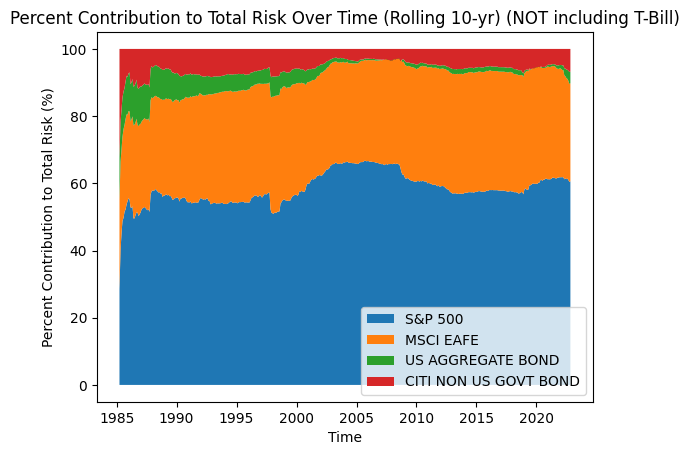

In [10]:


def calculate_risk_contribution(w,V):
    allocation_risk = np.sqrt(np.dot(np.dot(w, V), w))
    print("sigma = " + str(allocation_risk))
    mcs = np.dot(w, V) / allocation_risk
    cs = w * mcs
    pcs= cs / allocation_risk
    return mcs, cs, pcs

#df1_clone = df1.copy().drop(columns = ['Unnamed: 0', 'US 30 Day T-Bill'])
df1_clone = df1.copy()
num_years = 10
MRCs = []
RCs = []
PRCs = []
dates = []
weight = np.array([0.4, 0.2, 0.2, 0.15])
weight = weight / sum(weight)
for window in df1_clone.drop(columns = ['US 30 Day T-Bill']).rolling(num_years * 12):
  cov = window.drop(columns = ['Unnamed: 0']).cov().to_numpy()
  if(not np.isnan(cov).any()):
    MRC_temp, RC_temp, PRC_temp = calculate_risk_contribution(weight, cov)
    MRCs.append(MRC_temp)
    RCs.append(RC_temp)
    PRCs.append(PRC_temp)
    dates.append(window.iloc[-1]['Unnamed: 0'])
MRCs = np.asarray(MRCs)
RCs = np.asarray(RCs)
PRCs = np.asarray(PRCs)
dates = np.asarray(dates)
MRCs = MRCs.reshape((MRCs.shape[0], MRCs.shape[1]))
RCs = RCs.reshape((RCs.shape[0], RCs.shape[1]))
PRCs = PRCs.reshape((PRCs.shape[0], PRCs.shape[1])) * 100
print(MRCs[-1, :])
print(RCs[-1, :])
print(PRCs[-1, :])
print(MRCs[-1, :].sum())
print(RCs[-1, :].sum())
print(PRCs[-1, :].sum())
PRCs_temp = np.cumsum(PRCs, axis = 1)
print(PRCs_temp.shape)
plt.fill_between(dates, np.zeros(452), PRCs_temp[:,0], label = df1_clone.drop(columns = ['Unnamed: 0']).columns[0])
for i in range(len(weight) - 1):
  plt.fill_between(dates, PRCs_temp[:,i], PRCs_temp[:,i+1],label = df1_clone.drop(columns = ['Unnamed: 0']).columns[i+1])
#plt.fill_between(dates, PRCs_temp[:,-1], np.ones(452) * 100, label = df1_clone.drop(columns = ['Unnamed: 0', 'US 30 Day T-Bill']).columns[-1])
plt.title("Percent Contribution to Total Risk Over Time (Rolling 10-yr) (NOT including T-Bill)")
plt.xlabel("Time")
plt.ylabel("Percent Contribution to Total Risk (%)")
plt.legend(loc = "lower right")

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.2794090367644647e-08
            Iterations: 7
            Function evaluations: 39
            Gradient evaluations: 7
3.172274841790298
[[0.79316837]
 [0.79293132]
 [0.79300611]
 [0.79316904]]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.401261197264545e-09
            Iterations: 8
            Function evaluations: 45
            Gradient evaluations: 8
2.9063751744980517
[[0.72655786]
 [0.72664464]
 [0.7265516 ]
 [0.72662107]]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.547546048753778e-08
            Iterations: 7
            Function evaluations: 39
            Gradient evaluations: 7
2.8379302874834686
[[0.70966126]
 [0.70938138]
 [0.70943148]
 [0.70945617]]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0994732301015856e-07
            Iterations: 7


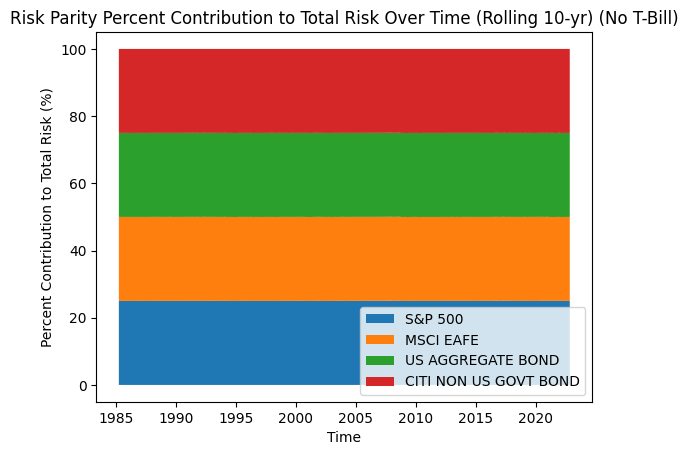

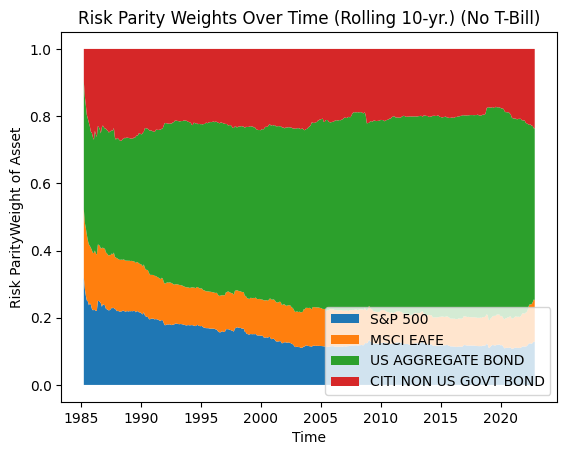

In [12]:
# code adapted from: https://thequantmba.wordpress.com/2016/12/14/risk-parityrisk-budgeting-portfolio-in-python/
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import inv,pinv
from scipy.optimize import minimize

 # risk budgeting optimization
def calculate_portfolio_var(w,V):
    # function that calculates portfolio risk
    w = np.matrix(w)
    return (w*V*w.T)[0,0]

def calculate_risk_contribution(w,V):
    # function that calculates asset contribution to total risk
    w = np.matrix(w)
    sigma = np.sqrt(calculate_portfolio_var(w,V))
    # Marginal Risk Contribution
    MRC = V*w.T
    # Risk Contribution
    RC = np.multiply(MRC,w.T)/sigma
    return RC

def calculate_risk_contribution_all_types(w,V):

    # function that calculates asset contribution to total risk
    w = np.matrix(w)
    sigma = np.sqrt(calculate_portfolio_var(w,V))
    # Marginal Risk Contribution
    MRC = V*w.T
    # Risk Contribution
    RC = np.multiply(MRC,w.T)/sigma
    PRC = RC / sum(RC)
    print(sigma)
    return MRC,RC, PRC
    """

    allocation_risk = np.sqrt(np.dot(np.dot(w, V), w))
    mcs = np.dot(w, V) / allocation_risk
    cs = w * mcs
    pcs= cs / allocation_risk
    return mcs, cs, pcs
    """
def risk_budget_objective(x,pars):
    # calculate portfolio risk
    V = pars[0]# covariance table
    x_t = pars[1] # risk target in percent of portfolio risk
    sig_p =  np.sqrt(calculate_portfolio_var(x,V)) # portfolio sigma
    risk_target = np.asmatrix(np.multiply(sig_p,x_t))
    asset_RC = calculate_risk_contribution(x,V)
    J = sum(np.square(asset_RC-risk_target.T))[0,0] # sum of squared error
    return J

def total_weight_constraint(x):
    return np.sum(x)-1.0

def long_only_constraint(x):
    return x
#weights = np.zeros((len(covs), 5))
#df1_clone = df1.copy().drop(columns = ['Unnamed: 0']).divide(100)

#df1_clone = df1.copy().drop(columns = ['Unnamed: 0', 'US 30 Day T-Bill'])
num_years = 10
rp_weights = []
MRCs = []
RCs = []
PRCs = []
dates = []
df1_clone = df1.copy()
for window in df1_clone.drop(columns = ['US 30 Day T-Bill']).rolling(num_years * 12):
#for window in df1_clone.rolling(num_years * 12):
  #cov = window.cov().to_numpy()
  cov = window.drop(columns = ['Unnamed: 0']).cov().to_numpy()
  V = cov
  if(not np.isnan(cov).any()):
    #x_t = [0.2, 0.2, 0.2, 0.2, 0.2] # your risk budget percent of total portfolio risk (equal risk)
    #w0 = [0.3, 0.1, 0.01, 0.39, 0.2]
    x_t = [0.25, 0.25, 0.25, 0.25]
    w0 = [0.1, 0.4, 0.3, 0.2]
    cons = ({'type': 'eq', 'fun': total_weight_constraint}, # makes x.T @ 1 = 1 as a constraint
    {'type': 'ineq', 'fun': long_only_constraint}) # makes constraint that x >= 0
    res= minimize(risk_budget_objective, w0, args=[V,x_t], method='SLSQP',constraints=cons, options={'disp': True})
    w_rb = np.asmatrix(res.x)
    w_rb = w_rb.reshape(w_rb.shape[1])
    rp_weights.append(np.asarray(res.x))
    MRC_temp, RC_temp, PRC_temp = calculate_risk_contribution_all_types(w_rb, cov)
    MRCs.append(MRC_temp)
    RCs.append(RC_temp)
    PRCs.append(PRC_temp)
    dates.append(window.iloc[-1]['Unnamed: 0'])
    #print("weights = " + str(w_rb))
    print(calculate_risk_contribution(w_rb,cov))
MRCs = np.asarray(MRCs)
RCs = np.asarray(RCs)
PRCs = np.asarray(PRCs)
dates = np.asarray(dates)
rp_weights = np.array(rp_weights)
MRCs = MRCs.reshape((MRCs.shape[0], MRCs.shape[1]))
RCs = RCs.reshape((RCs.shape[0], RCs.shape[1]))
PRCs = PRCs.reshape((PRCs.shape[0], PRCs.shape[1])) * 100
rp_weights = rp_weights.reshape((rp_weights.shape[0], rp_weights.shape[1]))
print(MRCs[-1, :])
print(RCs[-1, :])
print(PRCs[-1, :])
print(rp_weights[-1, :])
print("-----")
print(MRCs[-1, :].sum())
print(RCs[-1, :].sum())
print(PRCs[-1, :].sum())
print(rp_weights[-1, :].sum())

PRCs_temp = np.cumsum(PRCs, axis = 1)
rp_weights_temp = np.cumsum(rp_weights, axis = 1)
print(PRCs_temp.shape)
plt.fill_between(dates, np.zeros(452), PRCs_temp[:,0], label = df1_clone.drop(columns = ['Unnamed: 0']).columns[0])
for i in range(len(x_t) - 1):
  plt.fill_between(dates, PRCs_temp[:,i], PRCs_temp[:,i+1],label = df1_clone.drop(columns = ['Unnamed: 0']).columns[i+1])
#plt.fill_between(dates, PRCs_temp[:,-1], np.ones(452) * 100, label = df1_clone.drop(columns = ['Unnamed: 0', 'US 30 Day T-Bill']).columns[-1])
plt.title("Risk Parity Percent Contribution to Total Risk Over Time (Rolling 10-yr) (No T-Bill)")
plt.xlabel("Time")
plt.ylabel("Percent Contribution to Total Risk (%)")
plt.legend(loc = "lower right")
plt.show()

plt.fill_between(dates, np.zeros(452), rp_weights_temp[:,0], label = df1_clone.drop(columns = ['Unnamed: 0']).columns[0])
for i in range(len(x_t) - 1):
  plt.fill_between(dates, rp_weights_temp[:,i], rp_weights_temp[:,i+1],label = df1_clone.drop(columns = ['Unnamed: 0']).columns[i+1])
plt.title("Risk Parity Weights Over Time (Rolling 10-yr.) (No T-Bill)")
plt.xlabel("Time")
plt.ylabel("Risk ParityWeight of Asset")
plt.legend(loc = "lower right")
plt.show()

# Question 6

In [122]:
# Putnam returns
# value before = sum(shares * price on 9/30)
# value after = sum(shares * price on 10/31)
# return = (value after - value before) / value before
df2_clone = df2.copy()
percent_alloc_df = pd.DataFrame()
percent_alloc_df['Sectors'] = df2_clone.Sector.unique()
percent_alloc_df = percent_alloc_df.set_index('Sectors')

df2_clone['Putnam 09-30'] = df2_clone['Shares in Putnam Equity Fund'].multiply(df2_clone['Price On 09/30/2022'])
df2_clone['Putnam 10-31'] = df2_clone['Shares in Putnam Equity Fund'].multiply(df2_clone['Price On 10/31/2022'])
putnam_09_30_val = df2_clone['Putnam 09-30'].sum()
putnam_10_31_val = df2_clone['Putnam 10-31'].sum()
putnam_ret = (putnam_10_31_val - putnam_09_30_val) / putnam_09_30_val
print("a) Putnam return = " + str(putnam_ret))

# SP500 returns
# total market cap value = sum(market cap * inclusion)
# percentage of SP contribution = (market cap * inclusion) / total market cap value
# value before = sum(($1) * price on 9/30 * percentage of SP contribution)
# value after = sum(($1) * price on 10/31 * percentage of SP contribution)
# return = (value after - value before) / value before

#total_SP_mkt_cap = df2_clone['Market Cap ($ Millions)'].multiply(df2_clone['S&P 500 Inclusion']).sum()
#df2_clone['Percentage of S&P 500'] = (df2_clone['Market Cap ($ Millions)'].multiply(df2_clone['S&P 500 Inclusion'])) / total_SP_mkt_cap
total_SP_mkt_cap = df2_clone['Market Cap ($ Millions)'][df2_clone['S&P 500 Inclusion'] == True].sum()
df2_clone['Percentage of S&P 500'] = (df2_clone['Market Cap ($ Millions)'][df2_clone['S&P 500 Inclusion'] == True]) / total_SP_mkt_cap
SP500_09_30_val = df2_clone['Percentage of S&P 500'].multiply(df2_clone['Price On 09/30/2022']).sum()
SP500_10_31_val = df2_clone['Percentage of S&P 500'].multiply(df2_clone['Price On 10/31/2022']).sum()
SP500_ret = (SP500_10_31_val - SP500_09_30_val) / SP500_09_30_val
print("log retun = " + str(math.log(1 + SP500_ret)))
print("b) S&P500 return = " + str(SP500_ret))
# active return is difference between Putnam return and benchmark
print("c) Active return = Putnam ret - S&P500 ret = " + str(putnam_ret - SP500_ret))


# d)
# for SP500:
print("d)")
total_ret = 0
SP500_sector_rets = np.zeros(len(df2_clone.Sector.unique()))
i = 0
sector_sums = 0
for sector in df2_clone.Sector.unique():
  total_sector_mkt_cap = df2_clone['Market Cap ($ Millions)'][(df2_clone['Sector'] == sector) & (df2_clone['S&P 500 Inclusion'] == True)].sum()
  df2_clone['Percentage of S&P500 ' + str(sector)] = df2_clone['Market Cap ($ Millions)'][(df2_clone['Sector'] == sector) & (df2_clone['S&P 500 Inclusion'] == True)] / total_sector_mkt_cap
  val_before = df2_clone['Percentage of S&P500 ' + str(sector)].multiply(df2_clone['Price On 09/30/2022']).sum()
  val_after = df2_clone['Percentage of S&P500 ' + str(sector)].multiply(df2_clone['Price On 10/31/2022']).sum()

  sector_return = (val_after - val_before) / val_before
  print(sector + " return in SP = " + str(sector_return))
  total_ret += sector_return * (total_sector_mkt_cap / total_SP_mkt_cap)
  SP500_sector_rets[i] = sector_return
  sector_sums += total_sector_mkt_cap
  i += 1
print("/////////////////")
print("SP sector mkt cap sum = " + str(sector_sums))
print("SP total mkt cap = " + str(total_SP_mkt_cap))
print("Total ret DOES NOT MATCH SP TOTAL RET = " + str(total_ret))
SP500_total_ret_sum = total_ret
percent_alloc_df['S&P500 Returns'] = SP500_sector_rets
## SEEMS TO BE SOME DESCREPANCY BETWEEN TOTAL SP500 RETURN AND THE WEIGHTED SUM OF ALL SECTOR RETURNS
### PROBABLY NOT FLOATING POINT ERROR BASED ON SIZE --> CHECK THIS OUT!!
# Putnam returns by sector:
putnam_sector_rets = np.zeros(len(df2_clone.Sector.unique()))
i = 0
total_ret = 0
for sector in df2_clone.Sector.unique():
  putnam_sector_val_09_30 = df2_clone['Shares in Putnam Equity Fund'][df2_clone['Sector'] == sector].multiply(df2_clone['Price On 09/30/2022']).sum()
  putnam_sector_val_10_31 = df2_clone['Shares in Putnam Equity Fund'][df2_clone['Sector'] == sector].multiply(df2_clone['Price On 10/31/2022']).sum()
  if(putnam_sector_val_09_30 > 0):
    sector_return = (putnam_sector_val_10_31 - putnam_sector_val_09_30) / putnam_sector_val_09_30
    putnam_sector_rets[i] = sector_return
    i += 1
    putnam_sector_weight = putnam_sector_val_09_30 / putnam_09_30_val
    total_ret += putnam_sector_weight * sector_return
putnam_total_ret_sum = total_ret
print("Total putnam ret = " + str(total_ret)) ## this matches yay
percent_alloc_df['Putnam Returns'] = putnam_sector_rets

# e)
# get percent of each sector that SP500 holds
print("e)")
percent_alloc_array = np.zeros((len(df2_clone.Sector.unique()), 2))
i = 0
for sector in df2_clone.Sector.unique():
  total_sector_mkt_cap = df2_clone['Market Cap ($ Millions)'][(df2_clone['Sector'] == sector) & (df2_clone['S&P 500 Inclusion'] == True)].sum()
  #print("Percent of S&P in " + sector + " = " + str(total_sector_mkt_cap / total_SP_mkt_cap))
  percent_alloc_array[i , 0] = total_sector_mkt_cap / total_SP_mkt_cap
  i += 1

# get percent of total portfolio that Putnam holds in each sector
i = 0
for sector in df2_clone.Sector.unique():
  putnam_sector_investment = df2_clone['Shares in Putnam Equity Fund'][df2_clone['Sector'] == sector].multiply(df2_clone['Price On 09/30/2022']).sum()
  #print("Percent of Putnam Fund in " + sector + " = " + str(putnam_sector_investment / putnam_09_30_val))
  percent_alloc_array[i , 1] = putnam_sector_investment / putnam_09_30_val
  i += 1
# compare them
percent_alloc_df['S&P 500 weights'] = percent_alloc_array[:,0]
percent_alloc_df['Putnam weights'] = percent_alloc_array[:,1]
percent_alloc_df['Putnam - S&P weight'] = percent_alloc_df['Putnam weights'] - percent_alloc_df['S&P 500 weights']
print(percent_alloc_df)


### f)
print("f)")

### Allocation
B_s = percent_alloc_df['Putnam weights'].multiply(percent_alloc_df['S&P500 Returns']).sum()
B = SP500_total_ret_sum
R = putnam_total_ret_sum
print("active return from sum = " + str(putnam_total_ret_sum - SP500_total_ret_sum))
percent_alloc_df['Allocation'] = (percent_alloc_df['Putnam weights'] - percent_alloc_df['S&P 500 weights']).multiply(percent_alloc_df['S&P500 Returns'])
print("B_s - B = " +str(B_s - B))
print("sum(Allocation) = contribution to arithmetic excess ret from sector alloc. = " + str(percent_alloc_df['Allocation'].sum()))

### Selection
R_s = percent_alloc_df['S&P 500 weights'].multiply(percent_alloc_df['Putnam Returns']).sum()
percent_alloc_df['Selection'] = (percent_alloc_df['Putnam Returns'] - percent_alloc_df['S&P500 Returns']).multiply(percent_alloc_df['S&P 500 weights'])
print("R_s - B = " + str(R_s - B))
print("sum(Selection) = contribution to arithmetic excess return from selection = " +  str(percent_alloc_df['Selection'].sum()))

### Interaction
percent_alloc_df['Interaction'] = (percent_alloc_df['Putnam weights'] - percent_alloc_df['S&P 500 weights']).multiply(
    percent_alloc_df['Putnam Returns'] - percent_alloc_df['S&P500 Returns'])
print("R - R_s - B_s + B = " + str(R - R_s - B_s + B))
print("sum(Interaction) = contribution to arithmetic excess return from interaction = " + str(percent_alloc_df['Interaction'].sum()))
print("sum(Allocation) + sum(Selection) + sum(Interaction) = " + str(percent_alloc_df['Allocation'].sum() + percent_alloc_df['Selection'].sum() + percent_alloc_df['Interaction'].sum()))

print(percent_alloc_df * 100)



a) Putnam return = 0.0731096175158555
log retun = 0.07179783228923212
b) S&P500 return = 0.07443810541310004
c) Active return = Putnam ret - S&P500 ret = -0.0013284878972445457
d)
Industrials return in SP = 0.1446468733084071
Health Care return in SP = 0.09593280053416277
Information Technology return in SP = 0.07251354503224895
Communication Services return in SP = -0.006481967535161347
Consumer Discretionary return in SP = 0.022673659919127617
Utilities return in SP = 0.014993400923643175
Financials return in SP = 0.109818887964616
Materials return in SP = 0.0872887629850218
Real Estate return in SP = 0.0006167120645766615
Consumer Staples return in SP = 0.0756428137137266
Energy return in SP = 0.24606754137848708
/////////////////
SP sector mkt cap sum = 33898144.989999995
SP total mkt cap = 33898144.989999995
Total ret DOES NOT MATCH SP TOTAL RET = 0.07416357773664271
Total putnam ret = 0.0731096175158556
e)
                        S&P500 Returns  Putnam Returns  S&P 500 weights  \

In [128]:
percent_alloc_df_out = percent_alloc_df
percent_alloc_df_out.to_csv('Q6_chart.csv', encoding = 'utf-8-sig')

# Question 8

In [69]:
# a)

range_vec = np.linspace(start = 0.05, stop = 0.15, endpoint = True, num = 500)
n = len(df1_clone['S&P 500'])
np.random.seed(3)
rand_array = np.zeros((n, 500))

# b)
for i in range(500):
  rand_array[:, i] = np.random.normal(loc = 0, scale = range_vec[i] / math.sqrt(12), size = n)
rand_df = pd.DataFrame(rand_array)

# c)
df1_clone = df1.copy().drop(columns = ["Unnamed: 0"]).divide(100).add(1)
rand_df = rand_df.add(1)
betas = np.zeros((n, 500))
alphas = np.zeros((n, 500))
r_squareds = np.zeros((n, 500))
rand_df['S&P 500'] = df1_clone['S&P 500']
rand_df['US 30 Day T-Bill'] = df1_clone['US 30 Day T-Bill']
risk_free_rets = rand_df['US 30 Day T-Bill'].rolling(window = 30).apply(np.prod)
mkt_rets = rand_df['S&P 500'].rolling(window = 30).apply(np.prod)
df_vars = rand_df['S&P 500'].to_frame().rolling(30).var()
for i in range(500):
  df_covs = rand_df[['S&P 500', i]].rolling(30).cov().unstack()['S&P 500'][i]
  betas[:, i] = df_covs / df_vars.iloc[:,0]
  r_squareds[:, i] = (rand_df[['S&P 500', i]].rolling(30).corr().unstack()['S&P 500'][i]).pow(2)
  port_rets = rand_df[i].rolling(window = 30).apply(np.prod)
  alphas[: , i] = port_rets - risk_free_rets - (df_covs / df_vars.iloc[:,0]).multiply(mkt_rets - risk_free_rets)
alphas = pd.DataFrame(alphas).dropna().reset_index().drop(columns = ['index'])
betas = pd.DataFrame(betas).dropna().reset_index().drop(columns = ['index'])
r_squareds = pd.DataFrame(r_squareds).dropna().reset_index().drop(columns = ['index'])
print("Alphas: ")
print(alphas)
print("Betas: ")
print(betas)
print("R^2: ")
print(r_squareds)

Alphas: 
          0         1         2         3         4         5         6    \
0   -0.187324 -0.125796 -0.320533 -0.119240 -0.129429 -0.045800 -0.237139   
1   -0.210604 -0.101547 -0.317251 -0.165069 -0.158041 -0.050210 -0.273562   
2   -0.187637 -0.111380 -0.322675 -0.174161 -0.192552 -0.082097 -0.289761   
3   -0.204120 -0.113341 -0.314636 -0.172059 -0.213564 -0.093079 -0.274263   
4   -0.179910 -0.090656 -0.310252 -0.150569 -0.203068 -0.094931 -0.240440   
..        ...       ...       ...       ...       ...       ...       ...   
570  0.138089  0.029462  0.009055 -0.079860  0.010913  0.102782 -0.000443   
571  0.106058  0.051988  0.020633 -0.050926 -0.030139  0.097034  0.001313   
572  0.107085  0.070327  0.018626 -0.031197 -0.048389  0.092995 -0.039088   
573  0.086382 -0.002197  0.032789  0.018100 -0.077573  0.052315 -0.058482   
574  0.075101  0.004078  0.023908  0.012108 -0.089068  0.052719 -0.056087   

          7         8         9    ...       490       491       4

In [2]:
# Install required packages
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc cm-super dvipng
!pip install pypandoc
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript javascript-common
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libharfbuzz-icu0 libidn11
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpdfbox-java
  libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data preview-latex-style
  rake ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-rec

In [3]:
%cd drive/MyDrive/Putnam\ Project

/content/drive/MyDrive/Putnam Project


In [89]:

betas.to_csv('betas.csv')
alphas.to_csv('alphas.csv')
r_squareds.to_csv('r_squareds.csv')

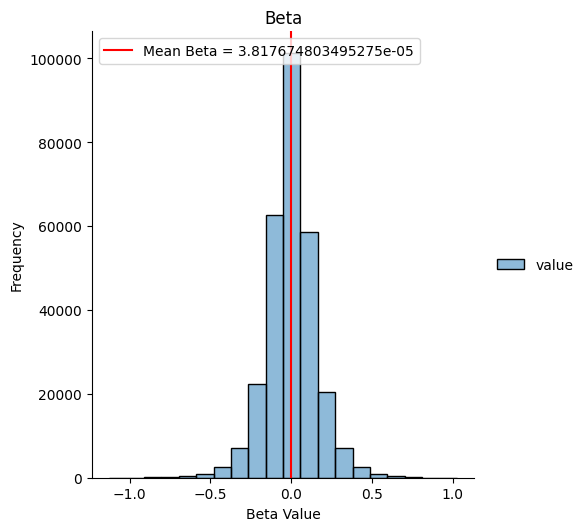

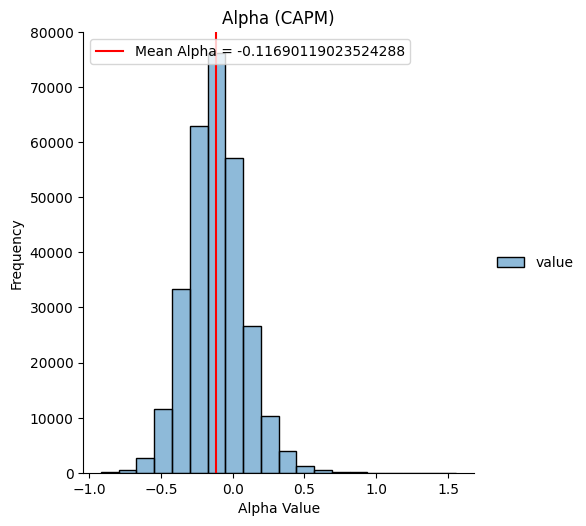

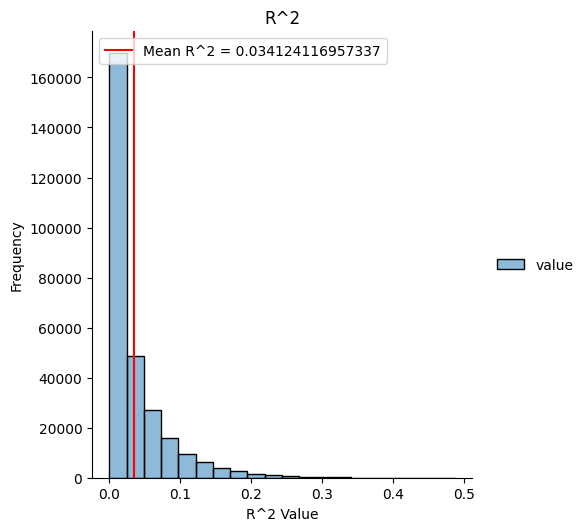

In [85]:


sns.displot(data = betas.melt().drop('variable',axis=1), kind='hist', bins = 20).set(title="Beta",
                                                                      xlabel="Beta Value", ylabel="Frequency")
plt.axvline(x=betas.mean().mean(), color='red', label = 'Mean Beta = '+ str(betas.mean().mean()))
plt.legend(loc = "upper left")
plt.show()
###
sns.displot(data = alphas.melt().drop('variable',axis=1), kind='hist', bins = 20).set(title="Alpha (CAPM)",
                                                                      xlabel="Alpha Value", ylabel="Frequency")
plt.axvline(x=alphas.mean().mean(),color='red', label = 'Mean Alpha = '+ str(alphas.mean().mean()))
plt.legend(loc = "upper left")
plt.show()
###

sns.displot(data = r_squareds.melt().drop('variable',axis=1), kind='hist', bins = 20).set(title="R^2",
                                                                      xlabel="R^2 Value", ylabel="Frequency")
plt.axvline(x=r_squareds.mean().mean(),color='red', label = 'Mean R^2 = '+ str(r_squareds.mean().mean()))
plt.legend(loc = "upper left")
plt.show()
###


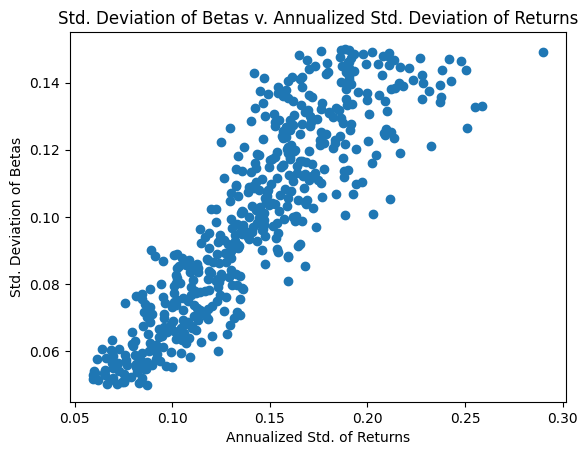

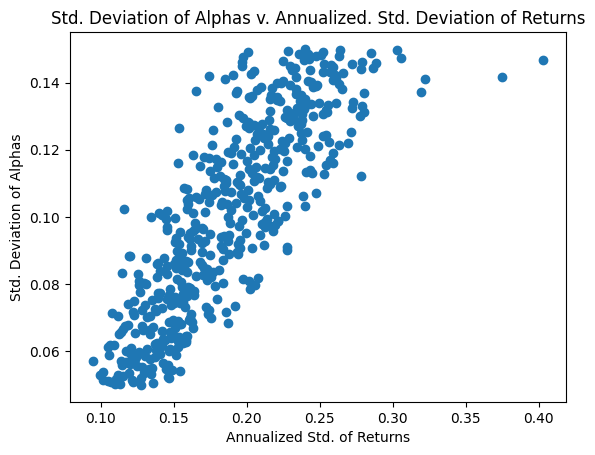

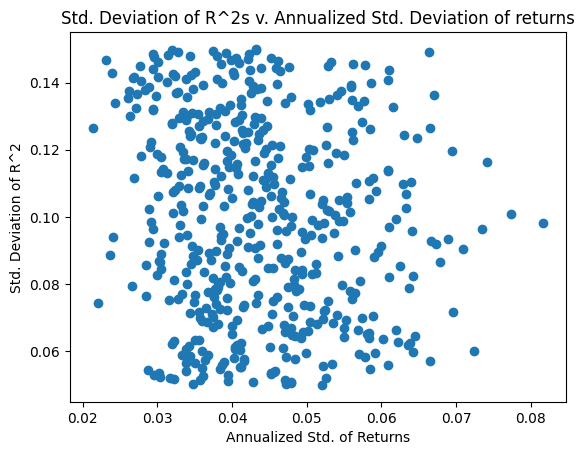

In [91]:
plt.scatter(x=betas.std(),y=range_vec, marker = 'o')
plt.title("Std. Deviation of Betas v. Annualized Std. Deviation of Returns")
plt.ylabel("Std. Deviation of Betas")
plt.xlabel("Annualized Std. of Returns")
plt.show()
plt.scatter(x=alphas.std() ,y = range_vec, marker = 'o')
plt.title("Std. Deviation of Alphas v. Annualized. Std. Deviation of Returns")
plt.ylabel("Std. Deviation of Alphas")
plt.xlabel("Annualized Std. of Returns")
plt.show()
plt.scatter(x=r_squareds.std(),y = range_vec, marker = 'o')
plt.title("Std. Deviation of R^2s v. Annualized Std. Deviation of returns")
plt.ylabel("Std. Deviation of R^2")
plt.xlabel("Annualized Std. of Returns")
plt.show()